In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('hw.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [6]:
df.drop('Index', axis = 1, inplace = True)

In [7]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0, 0.5, 'Weight')

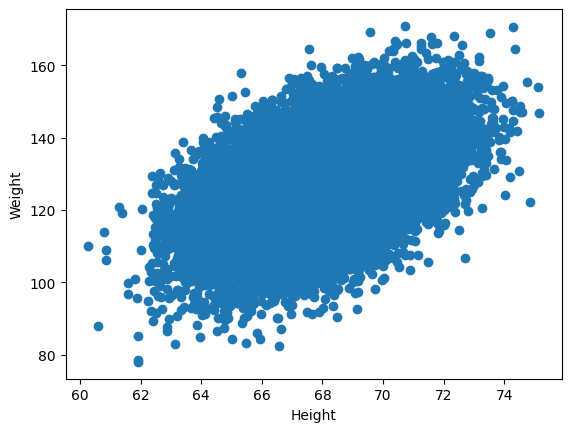

In [8]:
plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [11]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [12]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [13]:
## Divide out dataset into independent and dependent features
X = df[['Height(Inches)']] # Independent Feature
Y = df[['Weight(Pounds)']] # Dependent Feature

In [15]:
X.shape, Y.shape

((25000, 1), (25000, 1))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 42)

In [18]:
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [19]:
Y_train.shape, Y_test.shape

((17500, 1), (7500, 1))

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

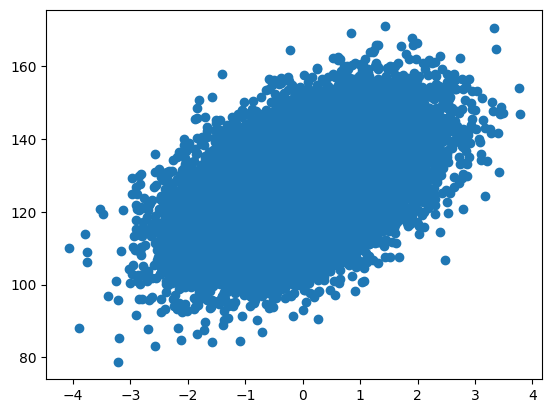

In [25]:
plt.scatter(X_train, Y_train)

In [26]:
## Model Training
from sklearn .linear_model import LinearRegression

In [27]:
regressor = LinearRegression()

In [28]:
# Training the train data
regressor.fit(X_train, Y_train)

LinearRegression()

In [29]:
regressor.intercept_

array([127.06667243])

In [30]:
regressor.coef_

array([[5.81259818]])

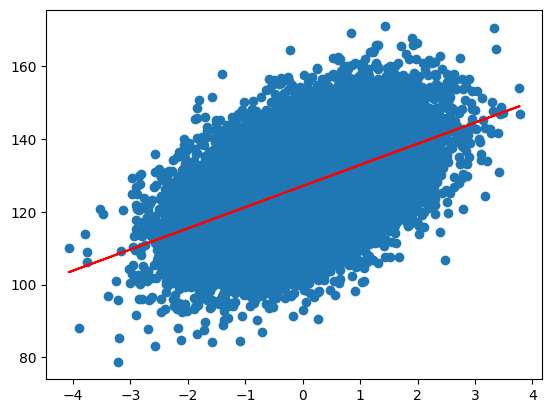

In [33]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [37]:
## Prediction for test data

Y_pred_test = regressor.predict(X_test)
Y_pred_test

array([[128.37941434],
       [126.75972205],
       [126.0312226 ],
       ...,
       [118.20472487],
       [133.61085719],
       [118.33510667]])

In [38]:
Y_test

,Weight(Pounds)
6868,134.2855
24016,111.9666
9668,135.9871
13640,126.3802
14018,100.1810
...,...
21156,125.6399
24654,126.1776
14592,126.4611
20160,134.9922


In [39]:
## Performance Metrices MAE, MSE, RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
mse = mean_squared_error(Y_test, Y_pred_test)
mae = mean_absolute_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

102.00655311790318
8.038079092885338
10.099829360830963


In [42]:
## Accuracy of the model ( R squared and Adjusted R Squared)

from sklearn.metrics import r2_score

score = r2_score(Y_test, Y_pred_test)
score

0.25961263876058704

In [44]:
## Display adjusted R squared

1 - (1 - score) * (len(Y_test)-1)/(len(Y_test) - X_test.shape[1] - 1)

0.2595138941138493

In [45]:
scaler

StandardScaler()

In [46]:
regressor

LinearRegression()